This code is part of the taskt 2.8 of the Sentinel Project.

Terms of use: This code is licensed under a Creative Commons Attribution 4.0 (https://creativecommons.org/licenses/by/4.0/). It is attributed to Alexander de Tomás and Cristina Madrid.

Reach contact:Alexander.DeTomas@uab.cat

# Resultats ENBIOS dues tecnologies (run miquel)

Define a function to make the visualization 


C:\Users\altz7\AppData\Local\Temp\ipykernel_36768\2738551295.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Dendrogram level"] = df["Processor"].str.count("\.")
C:\Users\altz7\AppData\Local\Temp\ipykernel_36768\2738551295.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['Scope']=='Internal'].index, inplace=True)


['Current' 'Target' 'Tendential']
['__']
[2021 2030]
['Total']
['energysystem' 'energysystem.electricity_generation'
 'energysystem.electricity_generation.open_field_pv_electricity'
 'energysystem.electricity_generation.wind_onshore_electricity']
['agricultural_land_occupation_ALOP' 'climate_change_GWP100'
 'fossil_depletion_FDP' 'freshwater_ecotoxicity_FETPinf'
 'freshwater_eutrophication_FEP' 'human_toxicity_HTPinf'
 'ionising_radiation_IRP_HE' 'marine_ecotoxicity_METPinf'
 'marine_eutrophication_MEP' 'metal_depletion_MDP'
 'natural_land_transformation_NLTP' 'ozone_depletion_ODPinf'
 'particulate_matter_formation_PMFP'
 'photochemical_oxidant_formation_POFP' 'terrestrial_acidification_TAP100'
 'terrestrial_ecotoxicity_TETPinf' 'urban_land_occupation_ULOP'
 'water_depletion_WDP']
[ 1.81019703e+07  1.31352627e+07  4.96670763e+06  1.51198763e+09
  9.30624786e+08  5.81362844e+08  9.10556661e+07  5.65016285e+07
  3.45540377e+07  2.29959887e+08  8.12701615e+07  1.48689726e+08
  5.93632103e

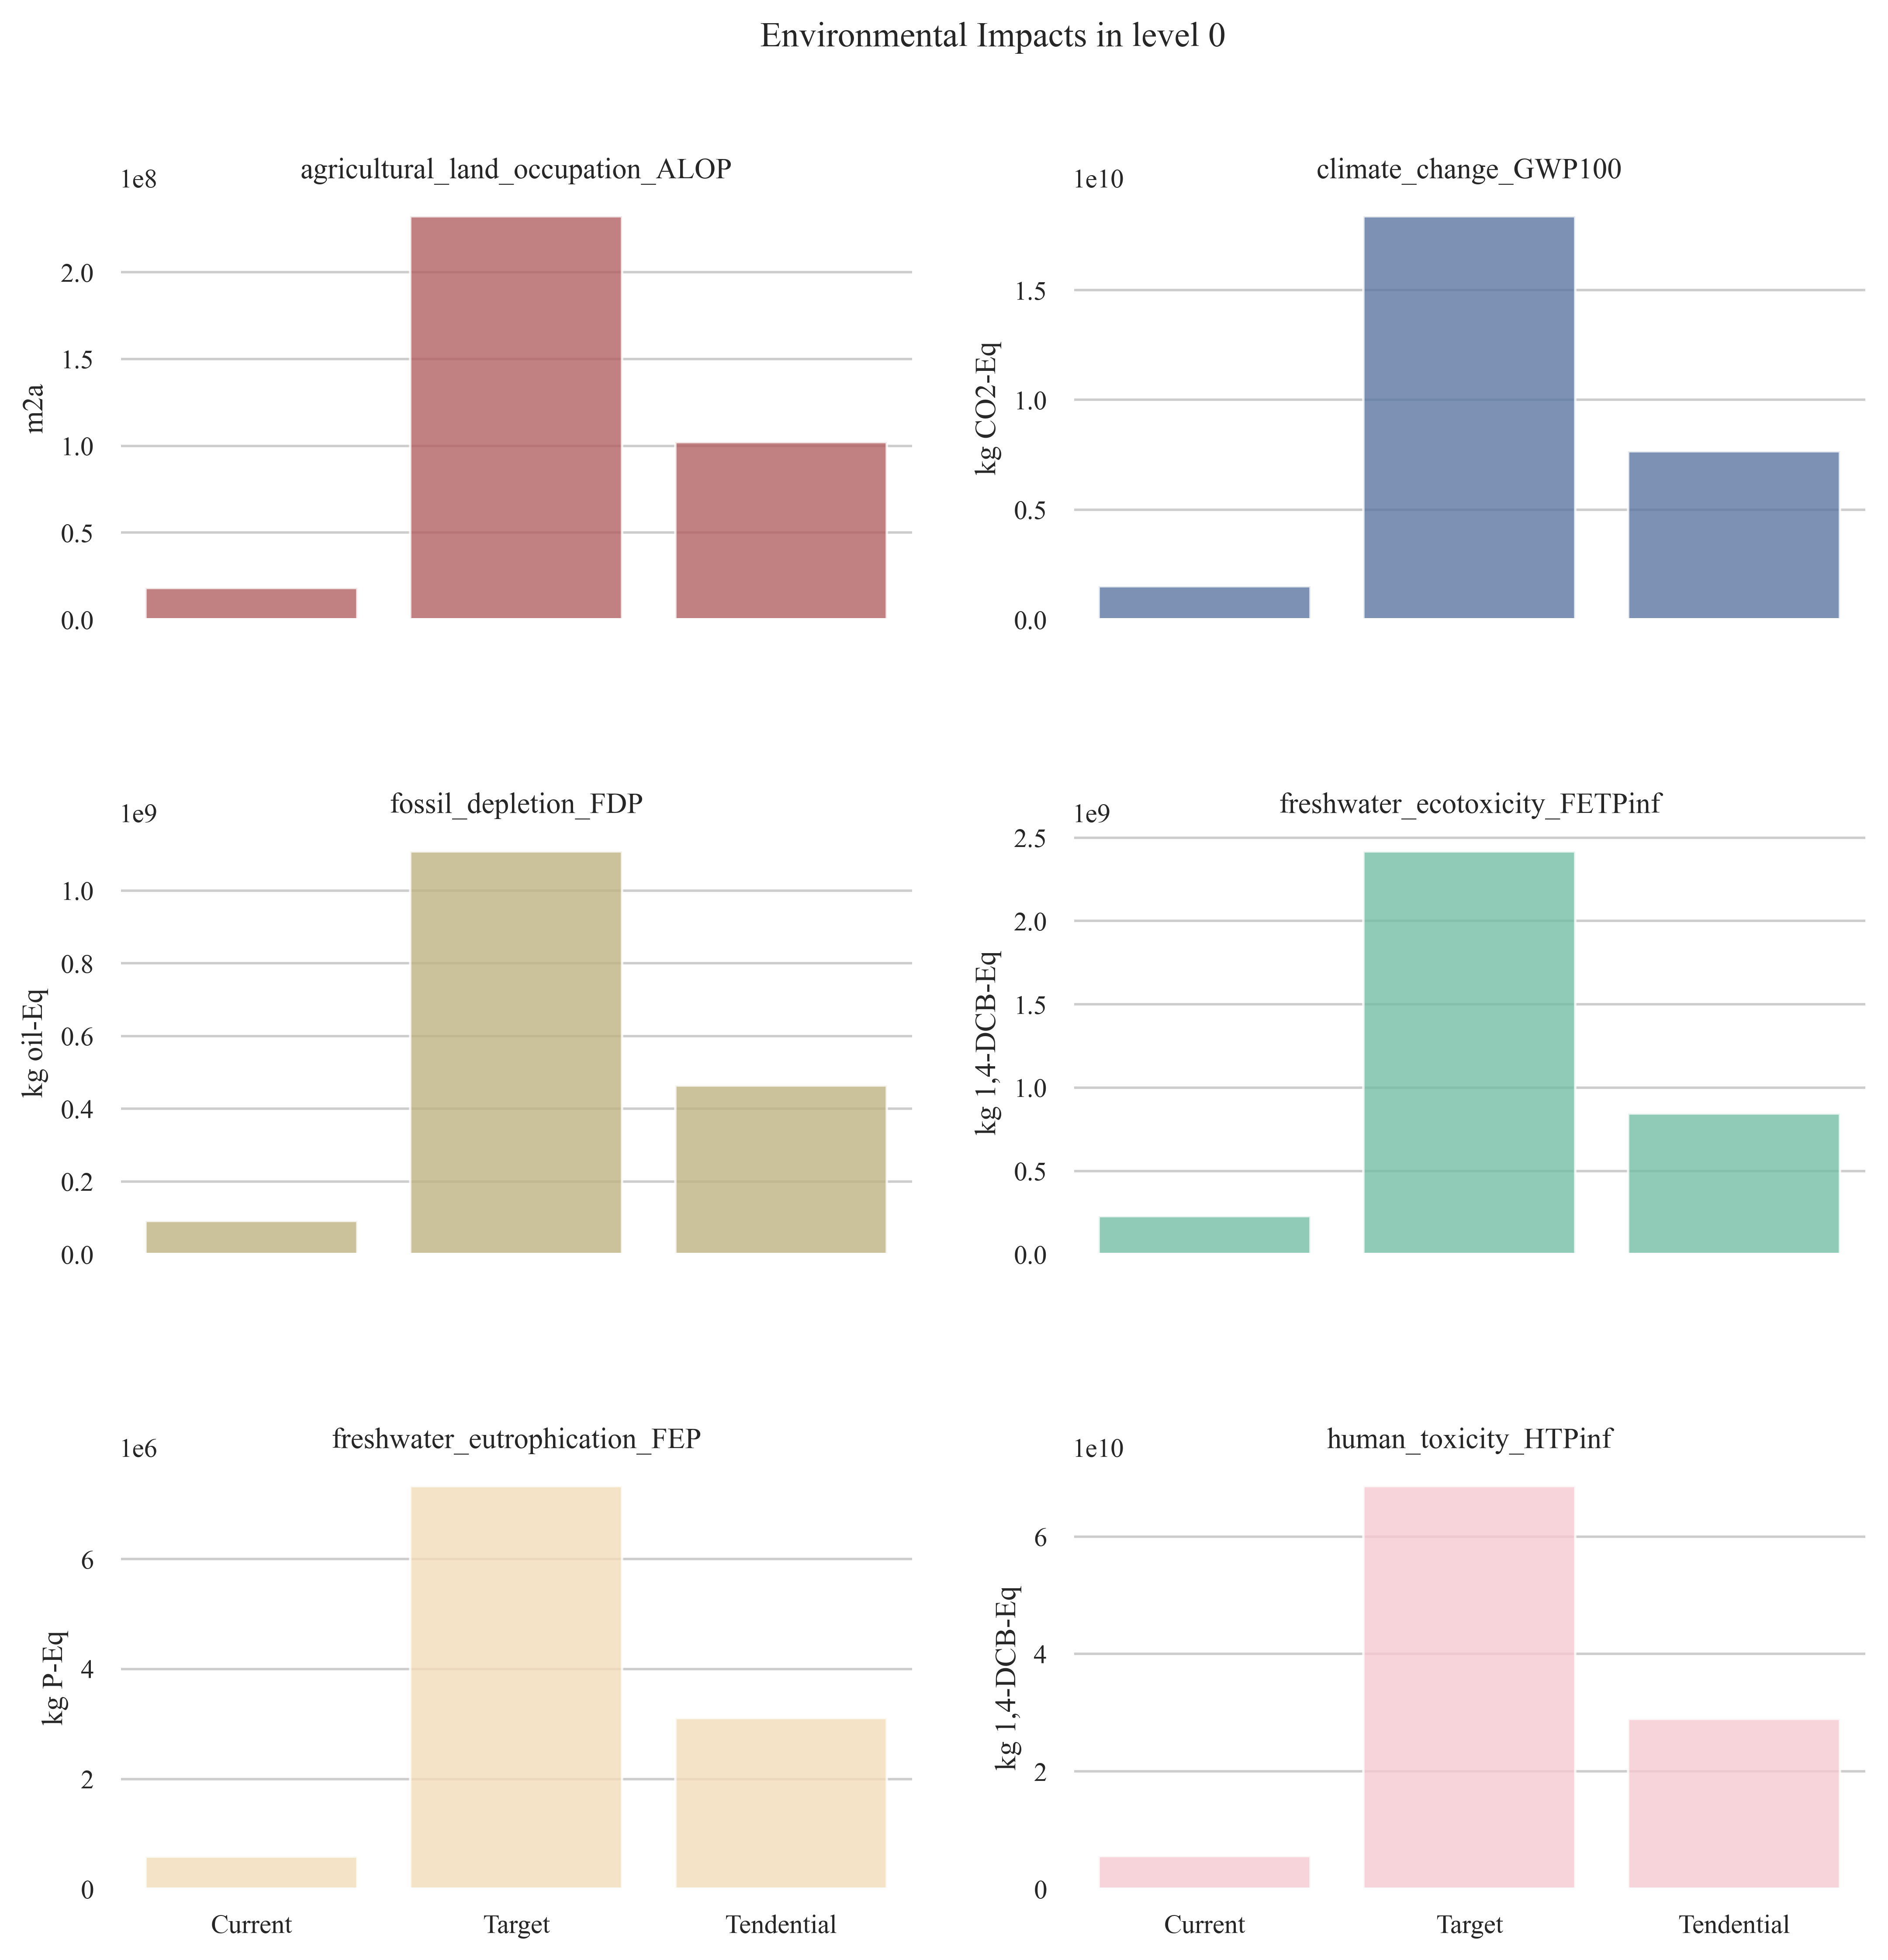

In [147]:

df=pd.read_csv(r'D:\icta\ENBIOS\miquel_2techs\indicators.csv', delimiter=',')

def visualization (df,dendrogram_level, output_path):
    """
    Visualització automàtica de tots els impactes per nivells
    Params:
    ->df: dataframe amb els resultats de sortida (csv)
    ->dendogram_level: integer 
    ->Output_path: path to save the results
    
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    #rename the columns. Create a standard names
    def rename_columns(df):
        a=df.columns.tolist()
        namecolumns=('Scenario','System','Period','Scope','Processor','Indicator','Value','Unit')
        counter=0
        for i in ddd:
            df.rename(columns={i:namecolumns[counter]},inplace=True)
            counter=counter+1 
    #include the units
    dfunit=pd.read_excel(r'D:\icta\coses_miquel\lcia_indicators_list_filtered_improved.xlsx')
    mydi=dict(zip(dfunit.Indicator,dfunit.Unit))
    for key in mydi.keys():
        key=str(key)
        df.loc[df.Indicator==key,'Unit']=mydi[key]
    # #Create a dendrogram lvl maker
    df = df.loc[~df["Processor"].str.contains("environment")]
    df["Dendrogram level"] = df["Processor"].str.count("\.")
    df.drop(df[df['Scope']=='Internal'].index, inplace=True)
    listindicatorr=df['Indicator'].unique().tolist()
    label=df['Unit'].unique().tolist()
    #define a new class to iterate over the dataframes
    class my_dictionary(dict):
        # __init__ function
        def __init__(self):
            self = dict()
        def add(self, key, value):
            self[key] = value
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    #Crea dataframes per cada indicador. Utilitza my dictionary per guardar-los a un diccionari
    dict_obj = my_dictionary()
    for i in df.columns:
        print(df[i].unique())
        nom_dataframes=[]
        listindicators=df['Indicator'].unique()
        listindicator=listindicators.tolist() #revisar utilitat?    
    for i,g in df.groupby('Indicator'):
        globals()['df_'+str(i)]=g
        nom_dataframes.append(i)
        dict_obj.add(i,g)
        
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    #visualització
    sns.set()
    sns.set_style({'axes.facecolor':'white', 'grid.color': '.8', 'font.family':'Times New Roman'})
    sns.set_context("paper")
    fig, axes = plt.subplots(3,2,figsize=(10,10),dpi=500, )
    plt.subplots_adjust(left=0.1, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.5)
    
    colors=['r','b','y','mediumaquamarine','navajowhite','pink',] #define the colors
    color= iter(colors)
    for (key, data), ax in zip(dict_obj.items(), axes.ravel()): #iterate plots and axis
        fig.suptitle('Environmental Impacts in level {}'.format(dendrogram_level))
        data=data.loc[data['Dendrogram level'] == dendrogram_level]
        #get the unit label
        unit=data['Unit'].unique().tolist()
        #plot
        sns.barplot(ax=ax,x='Scenario',y='Value',data=data,color=next(color),alpha=0.8,saturation=0.7).set(
        xlabel='',ylabel=str(unit[0]))
        
        title=str(key)
        ax.set_title(title)
        print(key,data)
    plt.savefig(output_path +\'Plot_Result'+'.png',facecolor='w', dpi=500) #falta que funcioni

            
#plt.tight_layout()
visualization(df,0,r'D:\icta\ENBIOS')


External script to include units to enbios results

In [108]:
###### LCIA INDICATORS LIST IMPROVED
#funció

#Importa el DF original d'ecoinvent
df2=pd.read_excel(r'D:\icta\coses_miquel\fer_units.xlsx')
#crea una columna que porti el nom de l'indicador igual que ha fet el Miquel
df2['enbios'] = [str(x) + '_' + str(y) + '_'+ str(z) for x, y,z in zip(df2['Method'], df2['Category'],df2['Indicator'])]

#import excel from miquel and fill the units
df3=pd.read_excel(r'D:\icta\coses_miquel\lcia_indicators_list.xlsx')
#store the enbios name and unit as a dictionary
mydi=dict(zip(df2.enbios,df2.Unit)) #diccionari amb key:nom indicador - value:Unit
#replace the units     
for key in mydi.keys():
    key=str(key) #guarda el nom de l'indicador
    df3.loc[df3.Indicator==key,'Unit']=mydi[key] #Mask Units. Indicadors amb key=key, la unitat serà el valor del diccionari     
#save it  
df3.to_excel(r'D:\icta\coses_miquel\lcia_indicators_list_improved.xlsx', index=False) #works

In [111]:
#use the filter function from Miquel, to get the same xcel filterd
input_path = r'D:\icta\coses_miquel\lcia_indicators_list_improved.xlsx'
output_path = r'D:\icta\coses_miquel\lcia_indicators_list_filtered_improved.xlsx'
method = "ReCiPe Midpoint (H) V1.13_"

df = pd.read_excel(input_path)

df.drop('Description', axis=1, inplace=True)
df = df.loc[df["Indicator"].str.contains(method, regex=False)]
list_indicators = df["Indicator"].tolist()
for i in list_indicators:
    new_indicator_name = i.replace(method, "").replace(" ", "_")
    df["Indicator"].replace({i:new_indicator_name}, inplace=True)

df.to_excel(output_path, index=False) #works


In [148]:
mydi

{'CML v4.8 2016 no LT_acidification no LT_acidification (incl. fate, average Europe total, A&B) no LT': 'kg SO2-Eq',
 'CML v4.8 2016 no LT_climate change no LT_GWP 100a no LT': 'kg CO2-Eq',
 'CML v4.8 2016 no LT_ecotoxicity: freshwater no LT_freshwater aquatic ecotoxicity (FAETP inf) no LT': 'kg 1,4-DCB-Eq',
 'CML v4.8 2016 no LT_ecotoxicity: marine no LT_marine aquatic ecotoxicity (MAETP inf) no LT': 'kg 1,4-DCB-Eq',
 'CML v4.8 2016 no LT_ecotoxicity: terrestrial no LT_terrestrial ecotoxicity (TETP inf) no LT': 'kg 1,4-DCB-Eq',
 'CML v4.8 2016 no LT_energy resources: non-renewable no LT_abiotic depletion potential (ADP): fossil fuels no LT': 'MJ',
 'CML v4.8 2016 no LT_eutrophication no LT_eutrophication (fate not incl.) no LT': 'kg PO4-Eq',
 'CML v4.8 2016 no LT_human toxicity no LT_human toxicity (HTP inf) no LT': 'kg 1,4-DCB-Eq',
 'CML v4.8 2016 no LT_material resources: metals/minerals no LT_abiotic depletion potential (ADP): elements (ultimate reserves) no LT': 'kg Sb-Eq',
 'CML 